# Clustering of VAE_all/VAE experiment

This notebook creates the clustering `clustering_res0.5.npy`

In [1]:
from campa.constants import campa_config
from campa.tl import Experiment
from campa.tl import (
    Cluster,
    Experiment,
    get_clustered_cells,
    load_full_data_dict,
    add_clustering_to_adata,
)
from campa.pl import annotate_img
import os
import numpy as np
import scanpy as sc

2022-10-05 13:35:35.236991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 13:35:52.178371: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-05 13:35:54.378441: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-05 13:35:54.378495: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Reading config from /home/icb/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini


In [2]:
exp_name = 'VAE_all/VAE'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')

## Cluster data

In [3]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})

/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
sc.pp.neighbors(adata, use_rep='X_latent')
sc.tl.leiden(adata, resolution=0.5, key_added='clustering_res0.5', random_state=0)
# write clustering to disk
np.save(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir, 'clustering_res0.5'), adata.obs['clustering_res0.5'])

/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


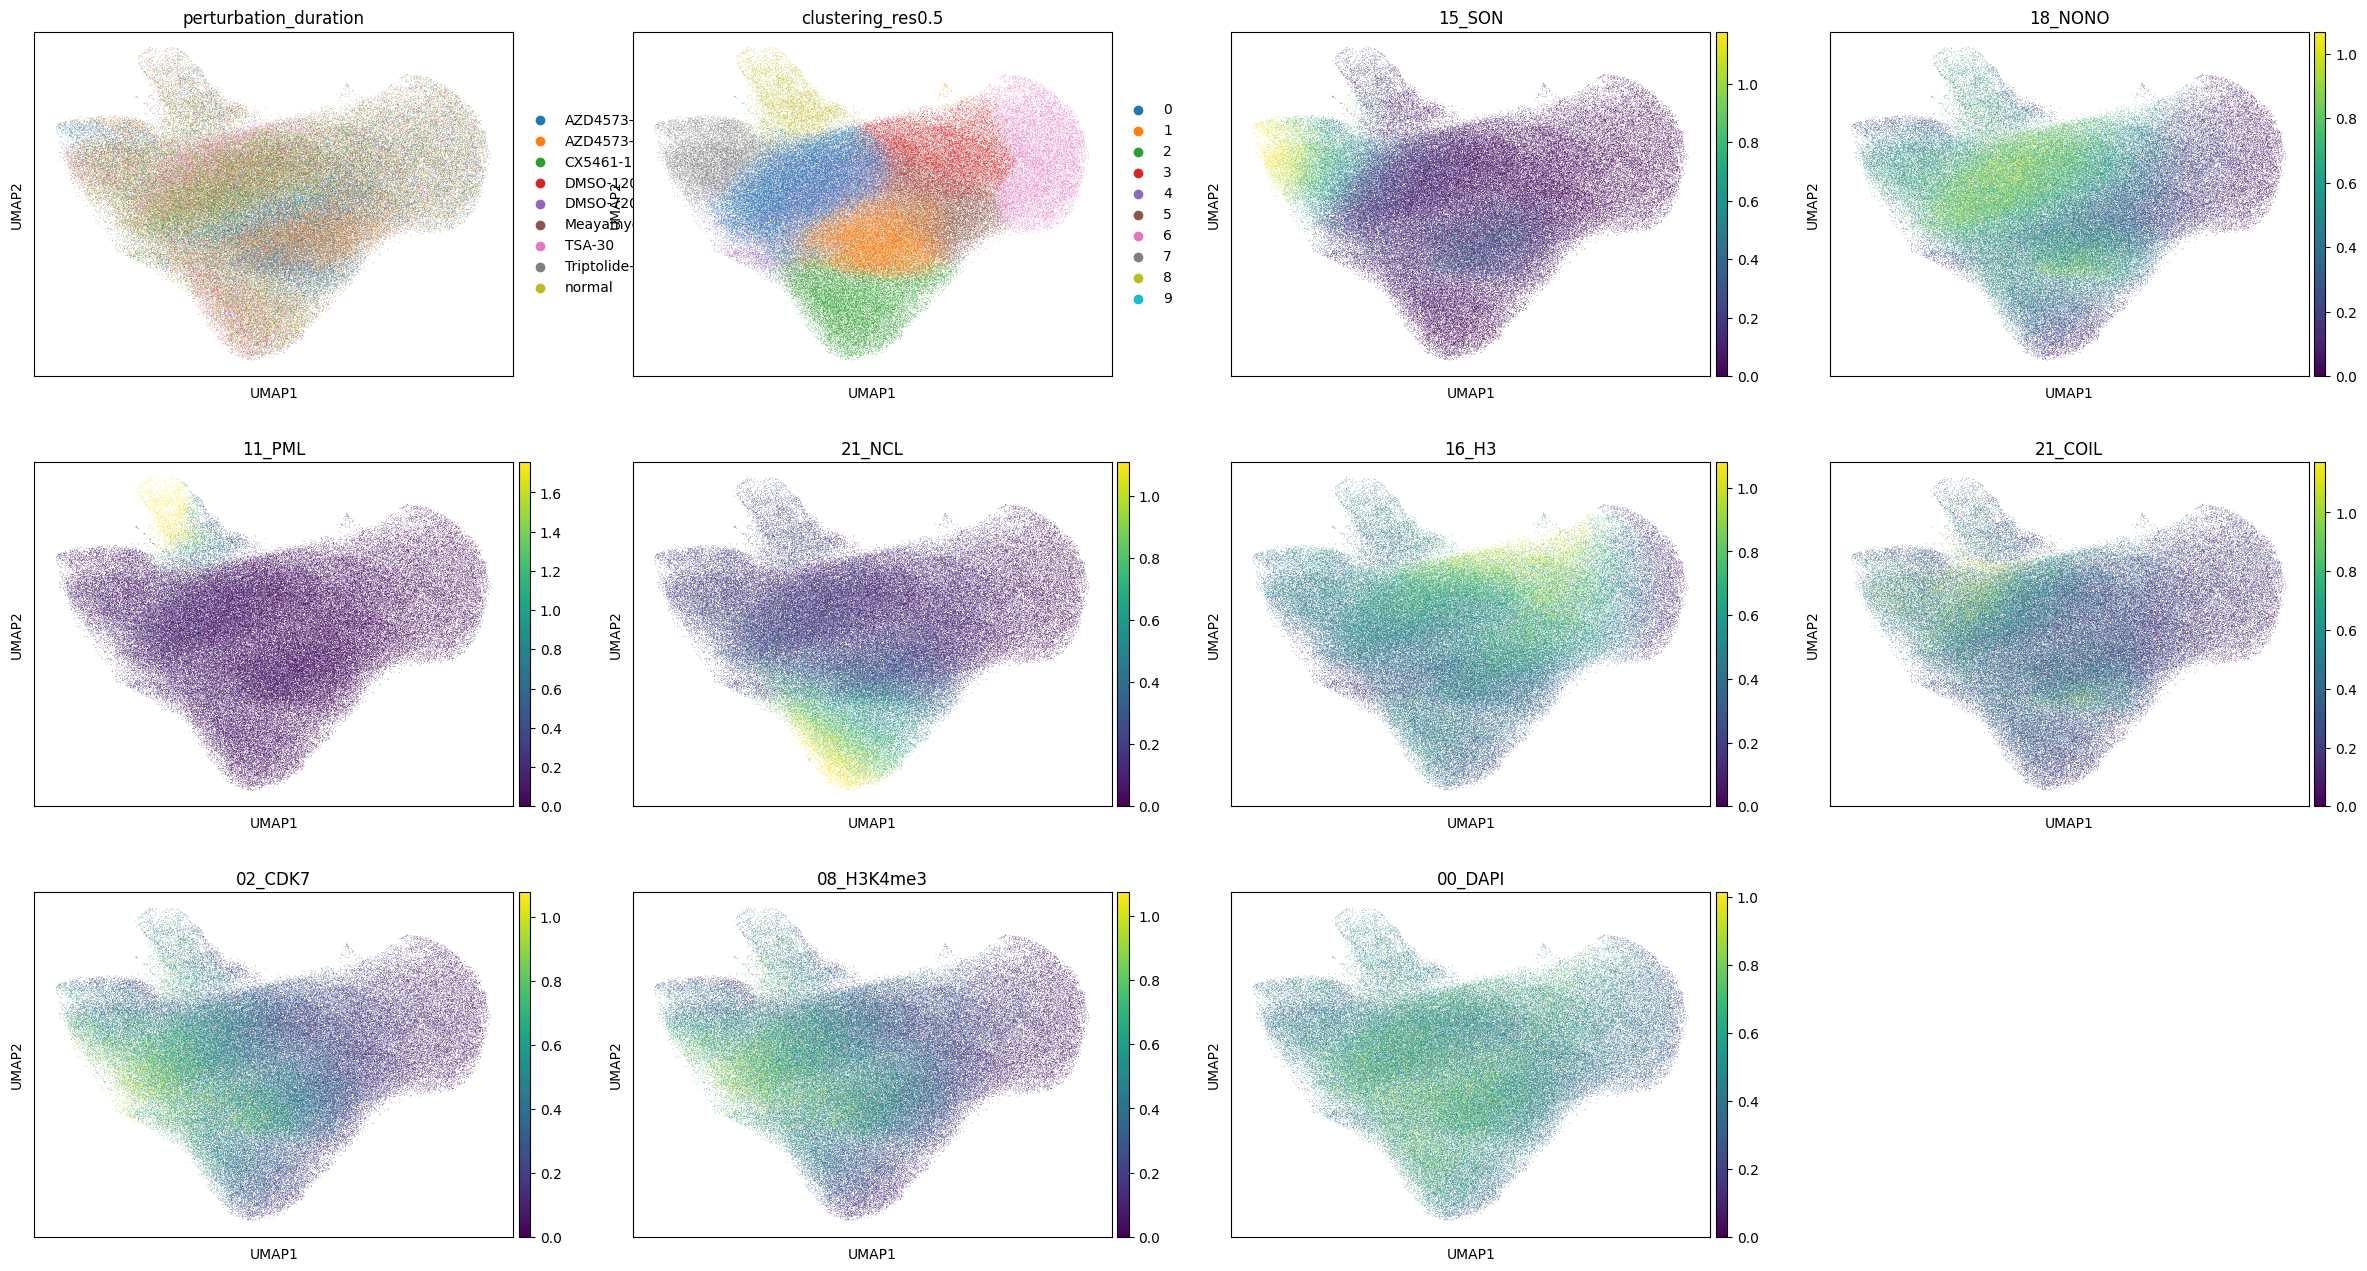

In [5]:
sc.pl.umap(adata, color=['perturbation_duration', 'clustering_res0.5', '15_SON', '18_NONO', 
                         '11_PML', '21_NCL',
                         '16_H3', '21_COIL',
                         '02_CDK7','08_H3K4me3',
                         '00_DAPI'
                        ], vmax='p99')

## Explore clustered data

In [6]:
# comment in for logging messages
#import logging
#logging.basicConfig(level=logging.INFO)

In [7]:
# quick plotting functions for looking at results
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_loadings(adata,var='clustering'):
    pixel_values_annotated = pd.concat([
        pd.DataFrame(adata.X,columns=adata.var_names).reset_index(drop=True),
        adata.obs[[var]].reset_index(drop=True)],
        axis=1)
    #col_standard = sns.clustermap(pixel_values_annotated.groupby(var).aggregate('mean'), z_score=0, cmap="vlag", figsize=[10,4],vmin=-3, vmax=3)
    row_standard = sns.clustermap(pixel_values_annotated.groupby(var).aggregate('mean'), z_score=1, cmap="vlag", figsize=[14,9],vmin=-3, vmax=3, method='ward')

In [8]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})

/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
# add clustering and colormap (from cluster_name_annotation.csv) to adata
cl.set_cluster_name('clustering_res0.5') 
add_clustering_to_adata(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.5', adata, cl.cluster_annotation)


Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/VAE/aggregated/sub-0.001/clustering_res0.5.npy


/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


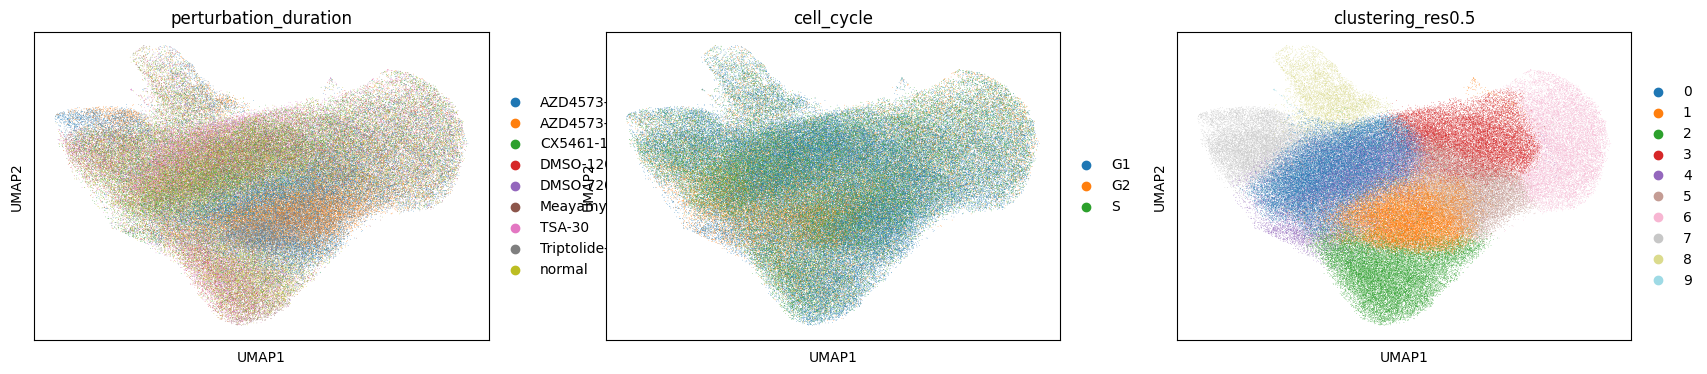

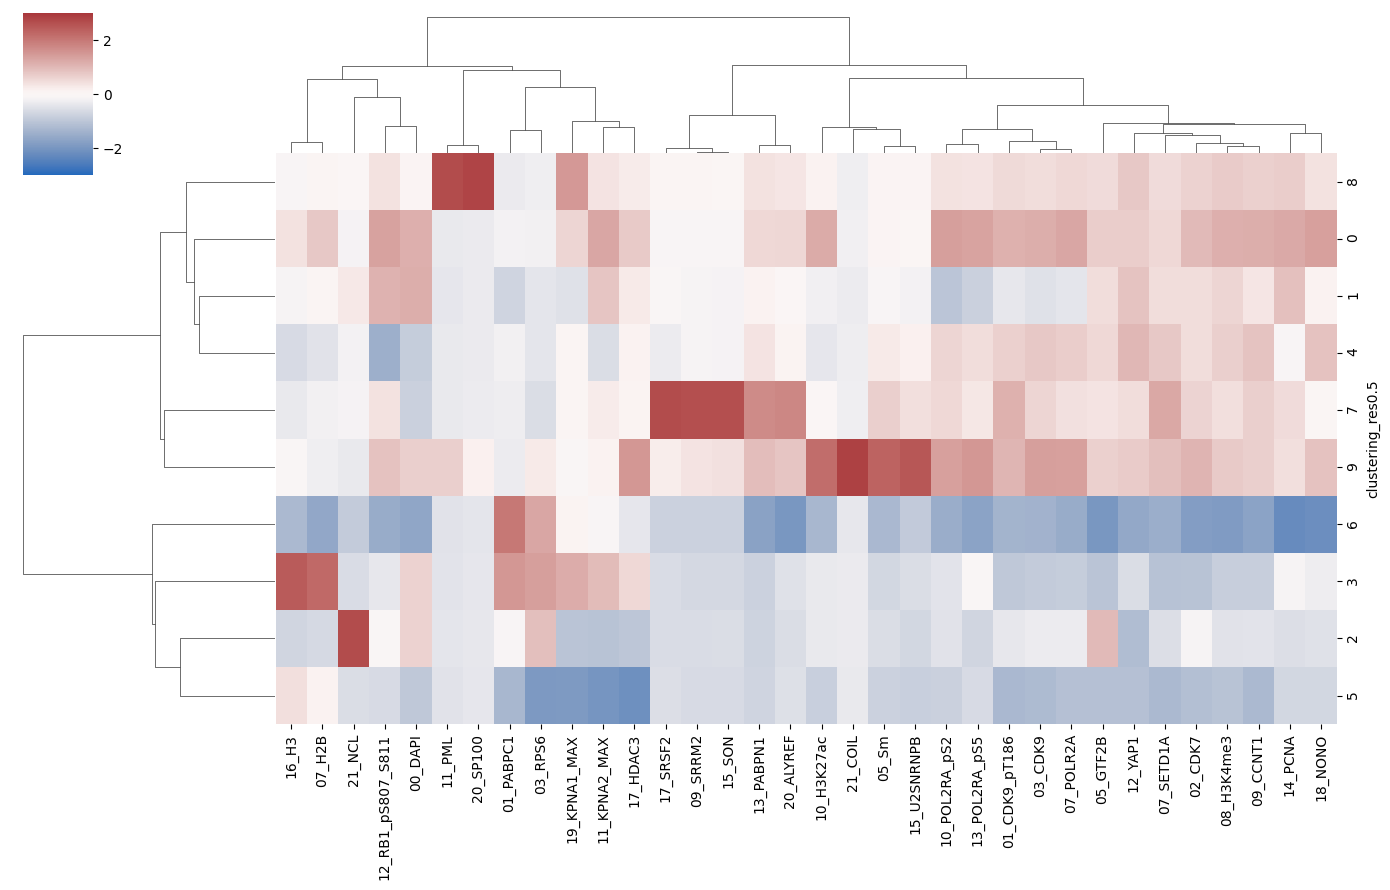

In [10]:
plt.rcParams['figure.figsize'] = [6, 4]
sc.pl.umap(adata, color=['perturbation_duration', 'cell_cycle', 'clustering_res0.5'], vmax='p99')

plot_loadings(adata, 'clustering_res0.5')

In [11]:
# NOTE: this may take a couple of minutes
# load data
exp = Experiment.from_dir(exp_name)
mpp_datas = load_full_data_dict(exp)
# project clustering to some example cells
example_cells = {}
example_cells.update(get_clustered_cells(mpp_datas, cl, 'clustering_res0.5', num_objs=5))

184A1_unperturbed/I09
184A1_unperturbed/I11
184A1_unperturbed/J10
184A1_unperturbed/J12
184A1_DMSO/I14
184A1_DMSO/J16
184A1_AZD4573/I13
184A1_AZD4573/I17
184A1_AZD4573/J14
184A1_AZD4573/J18
184A1_AZD4573/J21
184A1_CX5461/I18
184A1_CX5461/J09
184A1_CX5461/J22
184A1_TSA/I16
184A1_TSA/J13
184A1_TSA/J20
184A1_triptolide/I10
184A1_triptolide/J15
184A1_meayamycin/I12
184A1_meayamycin/I20


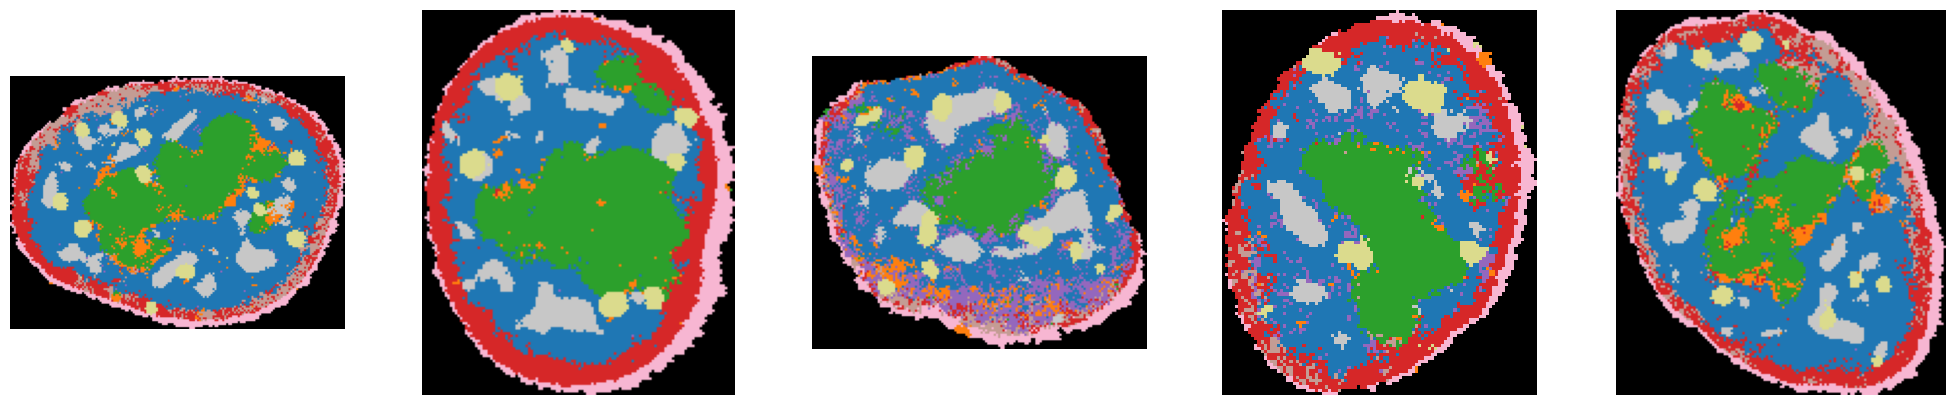

In [12]:
# plot example cells
data_dir = '184A1_unperturbed/I09'
fig, axes = plt.subplots(1,5, figsize=(25,5), squeeze=False)
for i in range(5):
    axes[0,i].imshow(example_cells['clustering_res0.5_colored'][data_dir][i])
for ax in axes.flat:
    ax.axis('off')